In [1]:
from IPython.display import Image
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

서로 다른 플랫폼의 데이터들은 스케일을 맞춘 다음 학습을 진행하면 공정한 평가 데이터를 바탕으로한 학습이 이루어진다.

## 표준화 (Standardization)

표준화는 데이터의 **평균을 0 분산 및 표준편차를 1**로 만들어 줍니다.

- 평균은 각각의 특성을 고려하지 않고 전체를 대표하는 값
- 분산은 데이터가 평균으로부터 얼마나 떨어져 있는가의 척도, 각각의 데이터에서 평균을 뺸 차이값의 제곱
- 분산은 제곱을 사용하여 값이 커져버려 분산에 루트를 씌운 표준편차를 이용

**표준화를 하는 이유**

- 서로 **다른 통계 데이터들을 비교하기 용이**하기 때문입니다.
- 표준화를 하면 평균은 0, 분산과 표준편차는 1로 만들어 데이터의 **분포를 단순화 시키고, 비교를 용이**하게 합니다.

### 표준화 공식
모든 데이터 값에서 평균을 빼고 표준편차로 나눔

In [2]:
Image(url='https://t1.daumcdn.net/cfile/tistory/999EC6335CDE8D8131', width=100)

### 샘플데이터

iris 붓꽃 샘플데이터를 가져옵니다.

In [5]:
from sklearn.datasets import load_iris

iris  = load_iris()
x = iris['data']
y = iris['target']

4개의 feature 데이터 중 1개의 feature만 임의로 선택합니다.

In [7]:
# X에 row는 전체를 가져오고, column은 0번째만 가져오도록 작성
X = x[:, 0]

### 표준화 코드 구현
표준화를 Python으로 직접 구현하면 다음과 같습니다. 공식을 그대로 코드로 옮기면 됩니다.

In [8]:
# x에 평균을 빼고 x의 표준편차로 나눔
X_ = (X - X.mean()) / X.std()

### 시각화
**시각화**로 표준화의 전과 후를 비교합니다.

C:\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


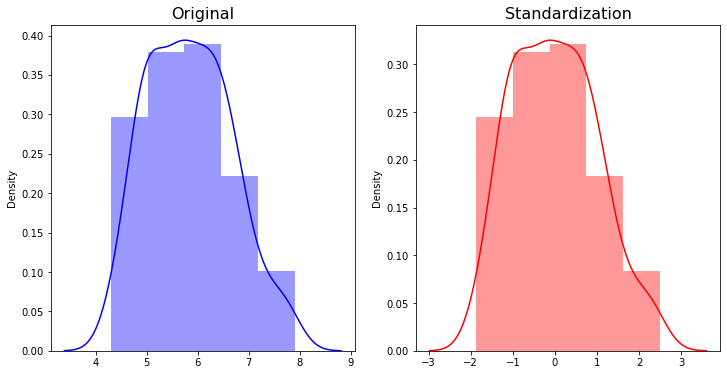

In [9]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.distplot(X, bins=5, color='b')
plt.title('Original', fontsize=16)

plt.subplot(1, 2, 2)
sns.distplot(X_, bins=5, color='r')
plt.title('Standardization', fontsize=16)
plt.show()

### iris 붓꽃 데이터 분포 시각화

C:\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


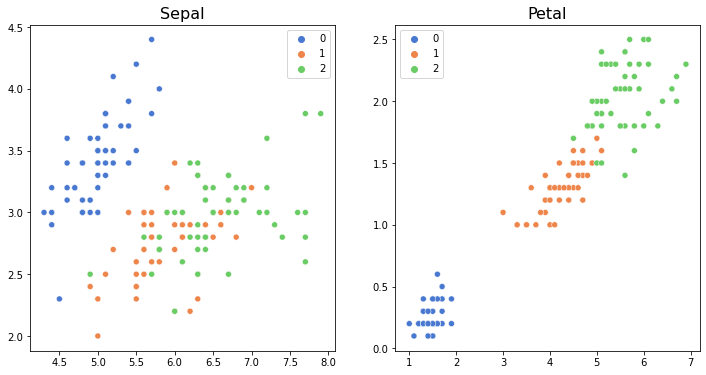

In [10]:
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
sns.scatterplot(x[:,0],x[:,1], hue=y, palette='muted')
plt.title('Sepal', fontsize=16)

plt.subplot(1,2,2)
sns.scatterplot(x[:,2],x[:,3], hue=y, palette='muted')
plt.title('Petal', fontsize=16)

plt.show()

## StandardScaler의 활용

`sklearn.preprocesssing` 에 `StandardScaler`로 표준화 (Standardization) 할 수 있습니다.


In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
scaler = StandardScaler()

In [19]:
x[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [18]:
# 스케일링 적용
# fit_transform()는 학습이 아닌 스케일링 진행함수
x_scaled = scaler.fit_transform(x)

In [20]:
x_scaled[:5]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ],
       [-1.50652052,  0.09821729, -1.2833891 , -1.3154443 ],
       [-1.02184904,  1.24920112, -1.34022653, -1.3154443 ]])

### Scale 전, 후 비교 (시각화)
Sepal

In [ ]:
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
sns.scatterplot(x[:,0],x[:,1], hue=y, palette='muted')
plt.title('Sepal(0riginal)', fontsize=16)

plt.subplot(1,2,2)
sns.scatterplot(x_scaled[:,0],x_scaled[:,1], hue=y, palette='muted')
plt.title('Sepal(Scaled)', fontsize=16)

plt.show()

In [23]:
#표준화 진행결과는 평균이 0/ 표준편차는 1
round(x_scaled.mean(), 2), x_scaled.std()

(-0.0, 1.0)

### Scale 전, 후 비교 (시각화)
Petal

C:\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


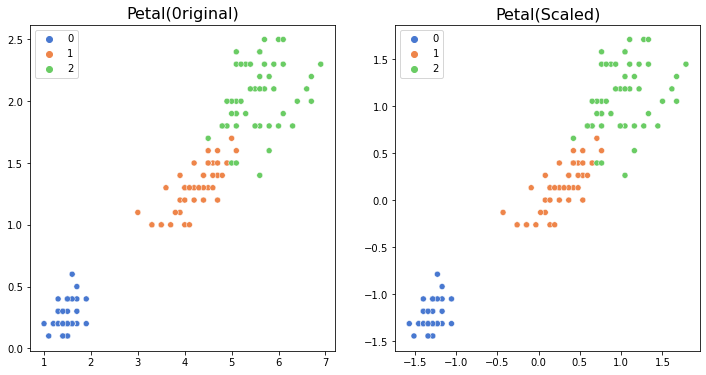

In [24]:
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
sns.scatterplot(x[:,2],x[:,3], hue=y, palette='muted')
plt.title('Petal(0riginal)', fontsize=16)

plt.subplot(1,2,2)
sns.scatterplot(x_scaled[:,2],x_scaled[:,3], hue=y, palette='muted')
plt.title('Petal(Scaled)', fontsize=16)

plt.show()

## 정규화 (Normalization)

정규화 (Normalization)도 표준화와 마찬가지로 데이터의 스케일을 조정합니다.

데이터의 생김새는 그대로이지만 데이터의 분포만 0~1로 변경, 분산이 낮을수록 데이터는 밀집

정규화가 표준화와 다른 가장 큰 특징은 **모든 데이터가 0 ~ 1 사이의 값**을 가집니다.

즉, 최대값은 1, 최소값은 0으로 데이터의 범위를 조정합니다.

### 정규화 공식

In [19]:
Image(url='https://mblogthumb-phinf.pstatic.net/MjAxODA3MzFfMjgx/MDAxNTMzMDIxNzg5MTkz.odx32KoGhDrjwJHgjb_NslL1Nlmsp4veLz6OULb2q00g.5Ynl7GOds1YAgBgJ_TSiuWjHZfrNWPq3hsHtwCjvNP0g.PNG.angryking/image_4532734831533021765958.png?type=w800', width=200)

### 정규화 코드 구현

In [25]:
X = x[:,0]

In [26]:
X_ = (X - X.min()) / (X.max() - X.min())

C:\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


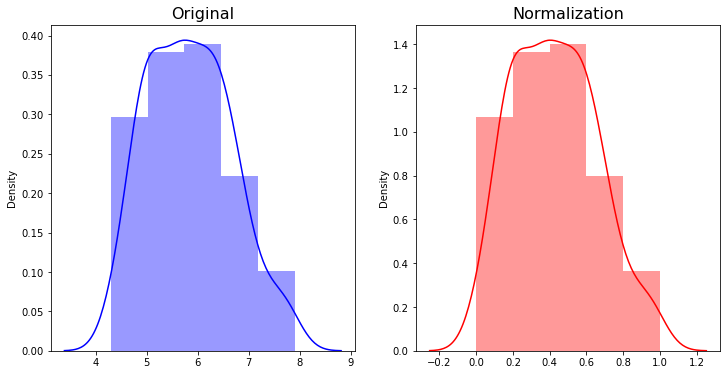

In [27]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.distplot(X, bins=5, color='b')
plt.title('Original', fontsize=16)

plt.subplot(1, 2, 2)
sns.distplot(X_, bins=5, color='r')
plt.title('Normalization', fontsize=16)

plt.show()

## MinMaxScaler의 활용

In [28]:
from sklearn.preprocessing import MinMaxScaler

In [31]:
scaler = MinMaxScaler()

In [32]:
x_scaled = scaler.fit_transform(x)

In [33]:
x[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [34]:
x_scaled[:5]

array([[0.22222222, 0.625     , 0.06779661, 0.04166667],
       [0.16666667, 0.41666667, 0.06779661, 0.04166667],
       [0.11111111, 0.5       , 0.05084746, 0.04166667],
       [0.08333333, 0.45833333, 0.08474576, 0.04166667],
       [0.19444444, 0.66666667, 0.06779661, 0.04166667]])

In [35]:
x_scaled.min(), x_scaled.max()

(0.0, 1.0)

### Scale 전, 후 비교 (시각화)

C:\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


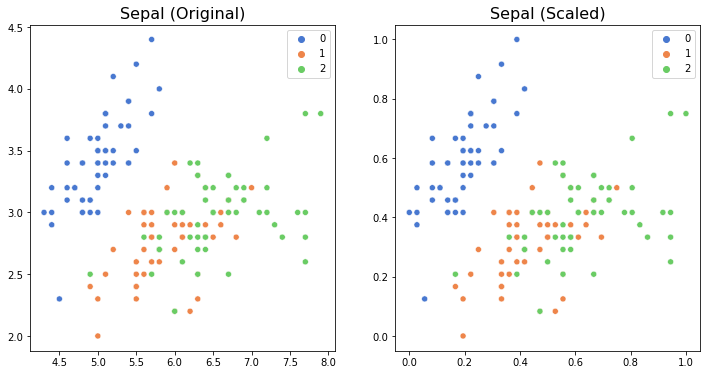

In [36]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(x[:, 0], x[:, 1], hue=y, palette='muted')
plt.title('Sepal (Original)', fontsize=16)

plt.subplot(1, 2, 2)
sns.scatterplot(x_scaled[:, 0], x_scaled[:, 1], hue=y, palette='muted')
plt.title('Sepal (Scaled)', fontsize=16)
plt.show()

C:\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


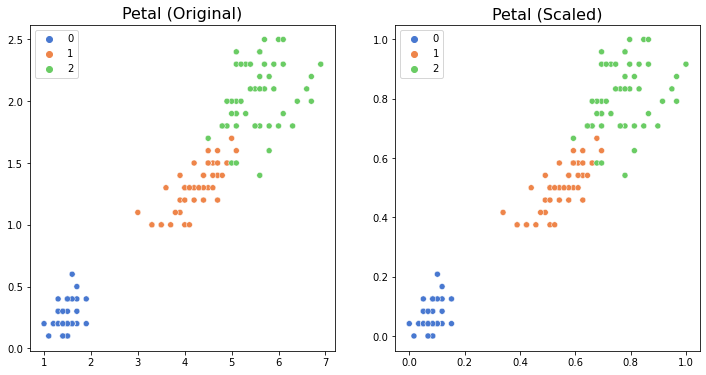

In [37]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x[:, 2], x[:, 3], hue=y, palette='muted')
plt.title('Petal (Original)', fontsize=16)

plt.subplot(1, 2, 2)
sns.scatterplot(x_scaled[:, 2], x_scaled[:, 3], hue=y, palette='muted')
plt.title('Petal (Scaled)', fontsize=16)

plt.show()

## Label Encoder

머신러닝 알고리즘은 문자열 데이터를 입력으로 받지 못합니다. 

따라서, 데이터가 가지고 있는 **범주형(Categorical) 데이터는 반드시 숫자형(Numerical)으로 변환**해주어야 합니다.

`LabelEncoder`는 범주형(Categorical) 데이터를 수치형으로 인코딩(encoding) 합니다.

여기서 **인코딩(encoding)** 이란, *문자형 -> 숫자형 데이터로 변환* 해주는 것을 의미합니다.

### 샘플 데이터 (tips)

In [38]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [40]:
tips['day'].value_counts()

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64

C:\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


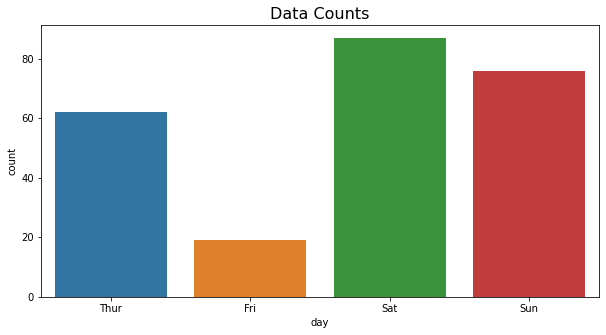

In [41]:
plt.figure(figsize=(10, 5))
sns.countplot(tips['day'])
plt.title('Data Counts', fontsize=16)
plt.show()

만약 `tips`데이터의 `day`컬럼에서의 값(value)인 [Thur(목), Fri(금), Sat(토), Sun(일)] 을 인코딩(encoding) 해주지 않고 그대로 머신러닝 모델에 학습데이터로 feed한다면 **error가 발생**합니다.

### apply를 활용한 인코딩(encoding)

아래와 같이 `encoding`이라는 함수를 정의한 후 변환하고자 하는 컬럼에 `apply`해줌으로써 인코딩을 진행합니다.

In [44]:
def convert(data):
    if data == 'Thur':
        return 0
    elif data == 'Fri':
        return 1
    elif data == 'Sat':
        return 2
    elif data == 'Sun':
        return 3

In [45]:
converted = tips['day'].apply(convert)
converted.value_counts()

2    87
3    76
0    62
1    19
Name: day, dtype: int64

인코딩 한 값을 간단히 시각화 해 볼 수 있습니다.

C:\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


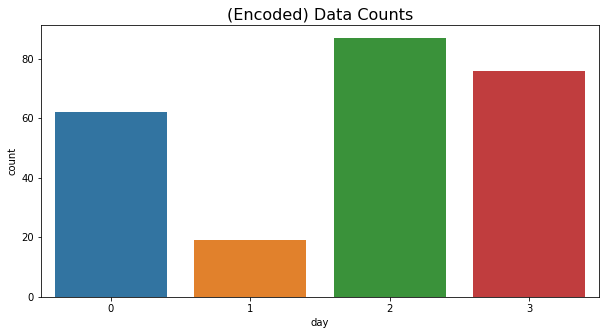

In [46]:
plt.figure(figsize=(10, 5))
sns.countplot(converted)
plt.title('(Encoded) Data Counts', fontsize=16)
plt.show()

`라벨 인코딩 작업을 할 때 위처럼 convert_Xxxx 함수를 만들어서 사용할 수도 있지만
실질적으로 저런 방식으로 현업에서 사용하지 않는다.
이유는 지금처럼 변수가 적지않고 변수의 갯수가 많을 경우도 많이 있기 때문에 일일이 인코딩하는 것은 비효율적이다.`

### LabelEncoder 활용

위와 같이 `apply`로 변환하고자 하는 컬럼 별로 인코딩을 해줄 수 있지만, `sklearn.preprocessing.LabelEncoder`를 활용하여 쉽게 인코딩할 수 있습니다.

In [47]:
from sklearn.preprocessing import LabelEncoder

# LabelEncoder 적용
encoder = LabelEncoder()

# LabelEncoder 변환
encoded = encoder.fit_transform(tips['day'])

#결과값 확인
encoded

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 3])

C:\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


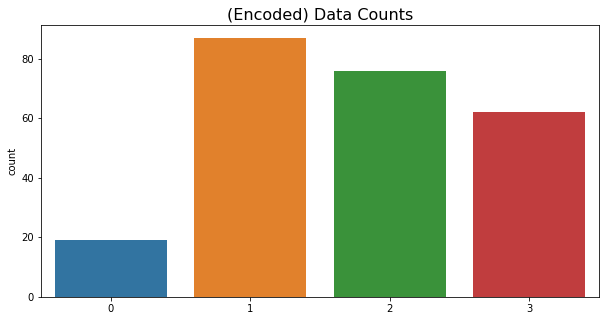

In [48]:
plt.figure(figsize=(10, 5))
sns.countplot(encoded)
plt.title('(Encoded) Data Counts', fontsize=16)
plt.show()

`LabelEncoder`를 사용하면 원래 class 의 label도 확인할 수 있습니다.

In [49]:
encoder.classes_

array(['Fri', 'Sat', 'Sun', 'Thur'], dtype=object)

### Inverse Transform(역변환)

머신러닝 학습을 위하여 어쩔 수 없이 범주형(Categorical) 데이터를 숫자형으로 변환하였다면, 이제 결과 확인을 위하여 다시 역변환이 필요합니다.

이는 `LabelEncoder`의 `inverse_transform`을 사용하여 쉽게 역변환할 수 있습니다.

In [51]:
#역변환
inversed = encoder.inverse_transform(encoded)
inversed

array(['Sun', 'Sun', 'Sun', 'Sun', 'Sun', 'Sun', 'Sun', 'Sun', 'Sun',
       'Sun', 'Sun', 'Sun', 'Sun', 'Sun', 'Sun', 'Sun', 'Sun', 'Sun',
       'Sun', 'Sat', 'Sat', 'Sat', 'Sat', 'Sat', 'Sat', 'Sat', 'Sat',
       'Sat', 'Sat', 'Sat', 'Sat', 'Sat', 'Sat', 'Sat', 'Sat', 'Sat',
       'Sat', 'Sat', 'Sat', 'Sat', 'Sat', 'Sun', 'Sun', 'Sun', 'Sun',
       'Sun', 'Sun', 'Sun', 'Sun', 'Sun', 'Sun', 'Sun', 'Sun', 'Sun',
       'Sun', 'Sun', 'Sat', 'Sat', 'Sat', 'Sat', 'Sat', 'Sat', 'Sat',
       'Sat', 'Sat', 'Sat', 'Sat', 'Sat', 'Sat', 'Sat', 'Sat', 'Sat',
       'Sat', 'Sat', 'Sat', 'Sat', 'Sat', 'Thur', 'Thur', 'Thur', 'Thur',
       'Thur', 'Thur', 'Thur', 'Thur', 'Thur', 'Thur', 'Thur', 'Thur',
       'Thur', 'Fri', 'Fri', 'Fri', 'Fri', 'Fri', 'Fri', 'Fri', 'Fri',
       'Fri', 'Fri', 'Fri', 'Fri', 'Sat', 'Sat', 'Sat', 'Sat', 'Sat',
       'Sat', 'Sat', 'Sat', 'Sat', 'Sat', 'Sun', 'Sun', 'Sun', 'Sun',
       'Sun', 'Thur', 'Thur', 'Thur', 'Thur', 'Thur', 'Thur', 'Thur',
       'Thur',

C:\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


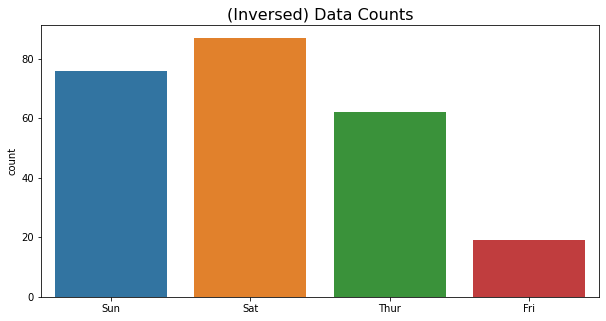

In [52]:
plt.figure(figsize=(10, 5))
sns.countplot(inversed)
plt.title('(Inversed) Data Counts', fontsize=16)
plt.show()